/var/folders/x4/rhvz72914vl02yh8_gxn8y5m0000gn/T/ipykernel_24294/3780182070.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
/var/folders/x4/rhvz72914vl02yh8_gxn8y5m0000gn/T/ipykernel_24294/3780182070.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set


🔹 Treinando Árvore de Decisão com criterion='entropy' 🔹
Acurácia na validação: 0.7989
Matriz de Confusão:
 [[92 13]
 [23 51]]


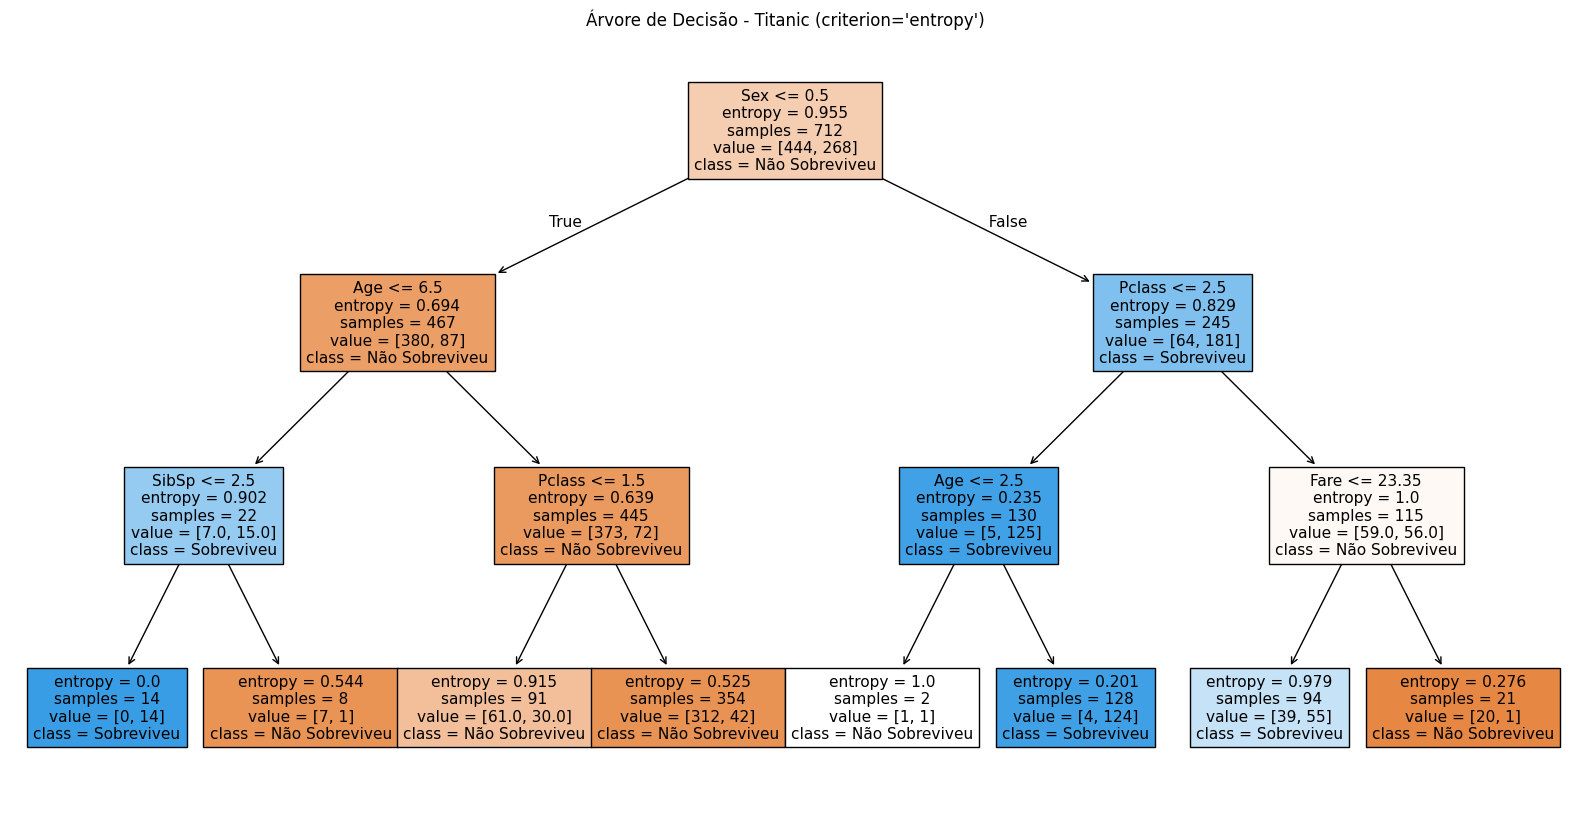


🔹 Treinando Árvore de Decisão com criterion='gini' 🔹
Acurácia na validação: 0.7989
Matriz de Confusão:
 [[92 13]
 [23 51]]


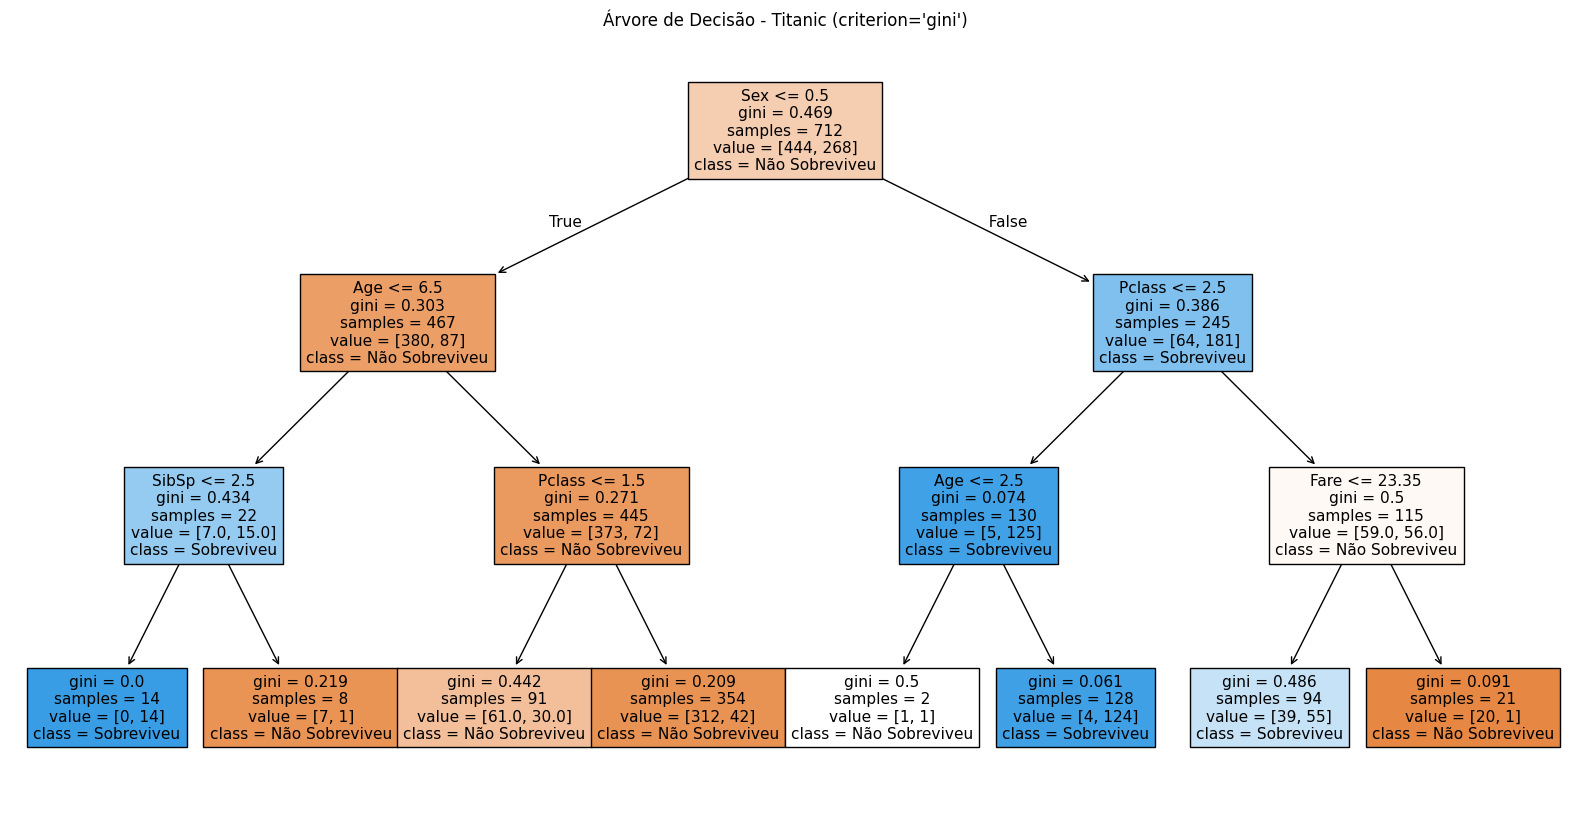


✅ Arquivo de submissão gerado: submission_entropy.csv


In [1]:
# Importação das bibliotecas necessárias
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


# 1. Leitura dos Dados
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# 2. Pré-processamento dos Dados
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)

# Conversão de variáveis categóricas
train_df["Sex"] = train_df["Sex"].map({"male": 0, "female": 1})
test_df["Sex"] = test_df["Sex"].map({"male": 0, "female": 1})
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
train_df["Embarked"] = train_df["Embarked"].map(embarked_mapping)
test_df["Embarked"] = test_df["Embarked"].map(embarked_mapping)

# Seleção de variáveis
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = train_df[features]
y = train_df["Survived"]

# Divisão do conjunto de treino para validação interna
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Função para treinar, avaliar e plotar a árvore de decisão
def train_and_evaluate(criterion):
    print(f"\n🔹 Treinando Árvore de Decisão com criterion='{criterion}' 🔹")

    # Treinamento do modelo
    clf = DecisionTreeClassifier(criterion=criterion, max_depth=3, random_state=42)
    clf.fit(X_train, y_train)

    # Avaliação do modelo
    y_val_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    cm = confusion_matrix(y_val, y_val_pred)

    print(f"Acurácia na validação: {acc:.4f}")
    print("Matriz de Confusão:\n", cm)

    # Visualização da árvore
    plt.figure(figsize=(20, 10))
    plot_tree(clf, feature_names=features, class_names=["Não Sobreviveu", "Sobreviveu"], filled=True)
    plt.title(f"Árvore de Decisão - Titanic (criterion='{criterion}')")
    plt.show()

    return clf

# Treinamento e visualização para Entropy e Gini
clf_entropy = train_and_evaluate("entropy")
clf_gini = train_and_evaluate("gini")

# Predição no conjunto de teste usando o modelo com 'entropy'
test_pred = clf_entropy.predict(test_df[features])

# Criação do arquivo de submissão
submission = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": test_pred})
submission.to_csv("submission_entropy.csv", index=False)
print("\n✅ Arquivo de submissão gerado: submission_entropy.csv")
